## Pandas for Data Manipulation

Pandas is an abbreviation of Panel Data. It is used for data wrangling, manipulation, analysis and visualization.

Pandas is built on the NumPy package. So it's underlying functions are array-like.

Pandas has two major ways of presenting data.

* **Pandas Series** - a one dimensional array-like datatype
* **Pandas DataFrame** - a two dimensional datatype for manipulating tabular data.

The last but less frequently used datatype in pandas is the PANEL DATA which is a framework for working with 3D data.

## bolu.oludupin@gmail.com

## Preparing your Pandas Environment

If you do not have pandas intalled, you can use

      pip install pandas

to intall pandas into your evironment.


Next, we have to import pandas into our working environment.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas Series Object

This is like a NumPy 1-D array. It also has homogeneous data types.


### Creating a Pandas Series Object

### 1. Creating Series Objects from Dictionaries

In [ ]:
dict1 = {'coke':200, 'malt': 250, 'nutri-milk': 300, 'zobo':100, 'fearless': 300}

#create pandas series using pd.series

drinks = pd.Series(dict1)

drinks


coke          200
malt          250
nutri-milk    300
zobo          100
fearless      300
dtype: int64

In [ ]:
drinks.index

Index(['coke', 'malt', 'nutri-milk', 'zobo', 'fearless'], dtype='object')

In [ ]:
drinks.values

array([200, 250, 300, 100, 300])

In [ ]:
drinks['coke']

200

In [ ]:
dict2 = {0: 950, 1: 1350, 2: 2500, 3: 700}

more_drinks = pd.Series(dict2, index = ['chi exotic', 'eva wine', 'vita milk', 'chivita'])

more_drinks

chi exotic   NaN
eva wine     NaN
vita milk    NaN
chivita      NaN
dtype: float64

### 2. Create a Pandas Series using lists

In [ ]:
index = ['chi exotic', 'eva wine', 'vita milk', 'chivita']
list1 = [950, 1350, 2500, 700]
more_drinks = pd.Series(list1, index = index)

more_drinks

chi exotic     950
eva wine      1350
vita milk     2500
chivita        700
dtype: int64

In [ ]:
xc = pd.Series(index, name = 'soft_drinks')

In [ ]:
xc

0    chi exotic
1      eva wine
2     vita milk
3       chivita
Name: soft_drinks, dtype: object

### Combining Pandas Series Objects

In [ ]:
print(drinks)
print(more_drinks, end='\n\n')

soft_drinks = pd.concat([drinks,more_drinks])

print(soft_drinks)

coke          200
malt          250
nutri-milk    300
zobo          100
fearless      300
dtype: int64
chi exotic     950
eva wine      1350
vita milk     2500
chivita        700
dtype: int64

coke           200
malt           250
nutri-milk     300
zobo           100
fearless       300
chi exotic     950
eva wine      1350
vita milk     2500
chivita        700
dtype: int64


### Some Indexing and Slicing



In [ ]:
soft_drinks['fearless'] = 350

soft_drinks['fearless']

350

In [ ]:
soft_drinks['coke': 'zobo']

coke          200
malt          250
nutri-milk    300
zobo          100
dtype: int64

In [ ]:
soft_drinks[6]

1350

In [ ]:
type(soft_drinks)
soft_drinks.dtype

dtype('int64')

## Pandas DataFrames

A DataFrame is a 2-D array of two or more Series objects.

### Creating DataFrames

### 1. Create DataFrames from a Dictionary of Lists

In [ ]:
df_dict = {'clubs': ['Real Madrid', 'Barcelona', 'Inter Milan', 'AC Milan', 'Chelsea', 'Liverpool', 'Manchester United'],
           'UCL Titles': [14, 3, 3, 7, 2, 5, 3]}

df = pd.DataFrame(df_dict, index = np.arange(1,8))
df

,clubs,UCL Titles
1,Real Madrid,14
2,Barcelona,3
3,Inter Milan,3
4,AC Milan,7
5,Chelsea,2
6,Liverpool,5
7,Manchester United,3


import numpy as np
from google.colab import autoviz
df_8691125063884370842 = autoviz.get_registered_df('df_8691125063884370842')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8691125063884370842, *['UCL Titles'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8691125063884370842 = autoviz.get_registered_df('df_8691125063884370842')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8691125063884370842, *['UCL Titles'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8691125063884370842 = autoviz.get_registered_df('df_8691125063884370842')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8691125063884370842, *['clubs'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8691125063884370842 = autoviz.get_registered_df('df_8691125063884370842')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8691125063884370842, *['UCL Titles', 'clubs'], **{'inner': 'stick'})
chart

## 2. Creating a DataFrame Object from lists.

You can create a DataFrame object from a list of lists.


In [70]:
list_df = pd.DataFrame([['Bob', 56,75,89], ['Kim', 78, 90, 95], ['Sam', 45,59,62], 
                        ['Dan', 78,35,69],['Kate', 68,90,45], ['Joy', 58, 69, 89]],
                       columns = ['names', 'math', 'physics', 'chemistry'])
list_df

,names,math,physics,chemistry
0,Bob,56,75,89
1,Kim,78,90,95
2,Sam,45,59,62
3,Dan,78,35,69
4,Kate,68,90,45
5,Joy,58,69,89


In [71]:
more_scores = pd.DataFrame([['Su', 67, 35, 89]], columns = ['names', 'math', 'physics', 'chemistry'])

list_df = pd.concat([list_df, more_scores], axis = 0, ignore_index = True)

In [72]:
list_df

,names,math,physics,chemistry
0,Bob,56,75,89
1,Kim,78,90,95
2,Sam,45,59,62
3,Dan,78,35,69
4,Kate,68,90,45
5,Joy,58,69,89
6,Su,67,35,89


In [73]:
list_df.describe()

,math,physics,chemistry
count,7.000000,7.000000,7.000000
mean,64.285714,64.714286,76.857143
std,12.092894,23.099165,18.569047
min,45.000000,35.000000,45.000000
25%,57.000000,47.000000,65.500000
50%,67.000000,69.000000,89.000000
75%,73.000000,82.500000,89.000000
max,78.000000,90.000000,95.000000


In [77]:
list_df['avg_score'] = (list_df['math']+list_df['physics']+list_df['chemistry'])/3

list_df['avg_score'] = round(list_df['avg_score'], 2)

list_df

,names,math,physics,chemistry,avg_score
0,Bob,56,75,89,73.33
1,Kim,78,90,95,87.67
2,Sam,45,59,62,55.33
3,Dan,78,35,69,60.67
4,Kate,68,90,45,67.67
5,Joy,58,69,89,72.00
6,Su,67,35,89,63.67


## Importing Datasets as Pandas DataFrame Objects

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Pandas Methods for Quickly Previewing your Dataset

In [2]:
data = pd.read_csv('Movie Data Pandas.csv')

data.head()

,Movie Title,Release Date,Genre (1),Director (1),Cast (1),Budget ($),Box Office Revenue ($),Profit
0,10 Cloverfield Lane,08/03/2016,Thriller,Dan Trachtenberg,Mary Elizabeth Winstead,15000000,108300000,93300000
1,13 Hours: The Secret Soldiers of Benghazi,15/01/2016,Action,Michael Bay,James Badge Dale,45000000,69400000,24400000
2,2 Guns,02/08/2013,Action,Baltasar Kormákur,Mark Wahlberg,61000000,131900000,70900000
3,21 Jump Street,16/03/2012,Comedy,Phil Lord,Jonah Hill,55000000,201500000,146500000
4,22 Jump Street,04/06/2014,Action,Phil Lord,Channing Tatum,84500000,331300000,246800000


In [3]:
data.tail()

,Movie Title,Release Date,Genre (1),Director (1),Cast (1),Budget ($),Box Office Revenue ($),Profit
503,X-Men: Days of Future Past,10/05/2014,Action,Bryan Singer,Hugh Jackman,200000000,747900000,547900000
504,You're Next,23/08/2013,Horror,Adam Wingard,Sharni Vinson,1000000,26800000,25800000
505,Zero Dark Thirty,19/12/2012,Drama,Kathryn Bigelow,Jessica Chastain,40000000,132800000,92800000
506,Zhong Kui: Snow Girl and the Dark Crystal,19/02/2015,Romance,Peter Pau,Li Bingbing,30000000,64470000,34470000
507,Zoolander 2,12/02/2016,Comedy,Ben Stiller,Ben Stiller,50000000,56000000,6000000


In [4]:
data.sample(5)

,Movie Title,Release Date,Genre (1),Director (1),Cast (1),Budget ($),Box Office Revenue ($),Profit
384,The Hunger Games: Mockingjay – Part 1,10/11/2014,Sci-Fi,Francis Lawrence,Jennifer Lawrence,125000000,755400000,630400000
194,Man of Steel,14/06/2013,Action,Zack Snyder,Henry Cavill,225000000,668000000,443000000
108,Fast & Furious 6,17/05/2013,Action,Justin Lin,Vin Diesel,160000000,788700000,628700000
431,The Raven,27/04/2012,Thriller,James McTeigue,John Cusack,26000000,29700000,3700000
210,Mortdecai,23/01/2015,Action,David Koepp,Johnny Depp,60000000,47000000,-13000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Movie Title             508 non-null    object
 1   Release Date            508 non-null    object
 2   Genre (1)               508 non-null    object
 3   Director (1)            508 non-null    object
 4   Cast (1)                508 non-null    object
 5   Budget ($)              508 non-null    int64 
 6   Box Office Revenue ($)  508 non-null    int64 
 7   Profit                  508 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 31.9+ KB


In [6]:
data.shape

(508, 8)

In [7]:
data.index

RangeIndex(start=0, stop=508, step=1)

In [8]:
data.columns

Index(['Movie Title', 'Release Date', 'Genre (1)', 'Director (1)', 'Cast (1)',
       'Budget ($)', 'Box Office Revenue ($)', 'Profit'],
      dtype='object')

### Renaming Columns in Pandas

There two ways of renaming columns in pandas

In [9]:
data.columns = ['movie_title', 'release_date', 'genre', 'director', 'cast', 'budget', 'box_office_rev', 'profit']

data.head(2)

,movie_title,release_date,genre,director,cast,budget,box_office_rev,profit
0,10 Cloverfield Lane,08/03/2016,Thriller,Dan Trachtenberg,Mary Elizabeth Winstead,15000000,108300000,93300000
1,13 Hours: The Secret Soldiers of Benghazi,15/01/2016,Action,Michael Bay,James Badge Dale,45000000,69400000,24400000


In [10]:
data.rename(columns = {'Movie Title': 'movie_title', 
                     'Release Date': 'release_date',
                     'Genre (1)': 'genre',
                     'Director (1)': 'director',
                     'Cast (1)': 'cast',
                     'Budget ($)': 'budget',
                     'Box Office Revenue ($)': 'box_office_rev',
                     'Profit': 'profit'
                    }, inplace = True)

In [11]:
data.head(1)

,movie_title,release_date,genre,director,cast,budget,box_office_rev,profit
0,10 Cloverfield Lane,08/03/2016,Thriller,Dan Trachtenberg,Mary Elizabeth Winstead,15000000,108300000,93300000


### Functions to Change Datatype of Columns in Pandas

In [12]:
#we want to change release_date to Datetime

data['release_date'] = pd.to_datetime(data['release_date'], format = '%d/%m/%Y')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   movie_title     508 non-null    object        
 1   release_date    508 non-null    datetime64[ns]
 2   genre           508 non-null    object        
 3   director        508 non-null    object        
 4   cast            508 non-null    object        
 5   budget          508 non-null    int64         
 6   box_office_rev  508 non-null    int64         
 7   profit          508 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 31.9+ KB


In [13]:
# we can also change the genre column to category

data['genre'] = data.genre.astype('category')

In [14]:
data.profit = pd.to_numeric(data.profit)

data['profit'] = data['profit'].astype(int)

### Pandas Functions to Select a Subset of the Dataset

#### data.query() Function

This is an SQL like function for selectiong or exploring a subset of the dataset. The query is enclosed in single quote, while strings within the query are enclosed in double quotes. 

In [15]:
data.query('genre == "Action" and budget > 100000000')

,movie_title,release_date,genre,director,cast,budget,box_office_rev,profit
5,300: Rise of an Empire,2014-03-04,Action,Noam Murro,Rodrigo Santoro,110000000,337600000,227600000
30,Ant-Man,2015-06-29,Action,Peyton Reed,Paul Rudd,130000000,519400000,389400000
35,Batman v Superman: Dawn of Justice,2016-03-19,Action,Zack Snyder,Ben Affleck,250000000,872700000,622700000
38,Battleship,2012-05-18,Action,Peter Berg,Alexander Skarsgård,220000000,303000000,83000000
56,Captain America: The Winter Soldier,2014-03-13,Action,Anthony Russo,Chris Evans,170000000,714400000,544400000
77,Dawn of the Planet of the Apes,2014-06-26,Action,Matt Reeves,Andy Serkis,235000000,710600000,475600000
96,Edge of Tomorrow,2014-05-28,Action,Doug Liman,Tom Cruise,178000000,370500000,192500000
107,Fantastic Four,2015-08-04,Action,Josh Trank,Miles Teller,120000000,168000000,48000000
108,Fast & Furious 6,2013-05-17,Action,Justin Lin,Vin Diesel,160000000,788700000,628700000
116,G.I. Joe: Retaliation,2013-03-27,Action,Jon Chu,Channing Tatum,130000000,375700000,245700000


In [16]:
data.query('genre == "Action" and profit < 0')

,movie_title,release_date,genre,director,cast,budget,box_office_rev,profit
7,71,2014-02-07,Action,Yann Demange,Jack O'Connell,8100000,2900000,-5200000
13,A Most Violent Year,2014-11-06,Action,J. C. Chandor,Oscar Isaac,20000000,12000000,-8000000
26,American Ultra,2015-08-21,Action,Nima Nourizadeh,Jesse Eisenberg,28000000,27100000,-900000
46,Blackhat,2015-01-08,Action,Michael Mann,Chris Hemsworth,70000000,19700000,-50300000
78,Dead Man Down,2013-03-08,Action,Niels Arden Oplev,Colin Farrell,30000000,18100000,-11900000
120,Getaway,2013-08-30,Action,Courtney Solomon,Ethan Hawke,18000000,11800000,-6200000
161,Jane Got a Gun,2016-01-29,Action,Gavin O'Connor,Natalie Portman,25000000,3000000,-22000000
200,Mechanic: Resurrection,2016-08-26,Action,Dennis Gansel,Jason Statham,40000000,7500000,-32500000
210,Mortdecai,2015-01-23,Action,David Koepp,Johnny Depp,60000000,47000000,-13000000
259,Premium Rush,2012-08-24,Action,David Koepp,Joseph Gordon-Levitt,35000000,31100000,-3900000


#### data.loc() Function 

The loc function uses the user specified column names and row index to subset data. 

In [17]:
data.loc[[1,8,70,45,39,354],['movie_title', 'genre', 'cast']]

,movie_title,genre,cast
1,13 Hours: The Secret Soldiers of Benghazi,Action,James Badge Dale
8,90 Minutes in Heaven,Drama,Hayden Christensen
70,Creed,Drama,Michael B. Jordan
45,Black Mass,Action,Johnny Depp
39,Beasts of the Southern Wild,Drama,Quvenzhané Wallis
354,The Croods,Adventure,Nicolas Cage


In [18]:
data.loc[300:350:5, 'movie_title':'cast']

,movie_title,release_date,genre,director,cast
300,Shaun the Sheep Movie,2015-01-24,Adventure,Mark Burton,Justin Fletcher
305,Sin City: A Dame to Kill For,2014-08-19,Crime,Frank Miller,Jessica Alba
310,Snow White and the Huntsman,2012-06-01,Action,Rupert Sanders,Charlize Theron
315,Spy,2015-05-15,Action,Paul Feig,Melissa McCarthy
320,Steve Jobs,2015-09-05,Biography,Danny Boyle,Michael Fassbender
325,Tammy,2014-07-02,Comedy,Ben Falcone,Melissa McCarthy
330,Terminator Genisys,2015-06-22,Sci-Fi,Alan Taylor,Arnold Schwarzenegger
335,The Age of Adaline,2015-04-24,Romance,Lee Toland Krieger,Blake Lively
340,The Bling Ring,2013-06-14,Comedy,Sofia Coppola,Emma Watson
345,The Boy,2016-01-22,Horror,William Brent Bell,Lauren Cohan


#### data.iloc() Function

iloc function on the other hand uses the in-built column and row index labels. 

In [19]:
data.iloc[50:70, 0:4]

,movie_title,release_date,genre,director
50,Brick Mansions,2014-04-23,Action,Camille Delamarre
51,Bridge of Spies,2015-10-04,Drama,Steven Spielberg
52,Brooklyn,2015-01-26,Drama,John Crowley
53,Bullet to the Head,2013-02-01,Crime,Walter Hill
54,Burnt,2015-10-06,Comedy,John Wells
55,By the Sea,2015-11-05,Drama,Angelina Jolie
56,Captain America: The Winter Soldier,2014-03-13,Action,Anthony Russo
57,Captive,2015-09-18,Crime,Jerry Jameson
58,Carol,2015-05-17,Drama,Todd Haynes
59,Central Intelligence,2016-06-10,Action,Rawson Marshall Thurber


In [20]:
data.iloc[[67], [0,5,6,7]]

,movie_title,budget,box_office_rev,profit
67,Cloud Atlas,128500000,130500000,2000000


#### Combining loc and iloc with conditional statements. 

We can combine loc and iloc with conditions in order to subset our data. Just like with the query function.

In [21]:
data.loc[(data['genre'] == 'Action') & (data['profit'] < 10000000)]

,movie_title,release_date,genre,director,cast,budget,box_office_rev,profit
7,71,2014-02-07,Action,Yann Demange,Jack O'Connell,8100000,2900000,-5200000
13,A Most Violent Year,2014-11-06,Action,J. C. Chandor,Oscar Isaac,20000000,12000000,-8000000
26,American Ultra,2015-08-21,Action,Nima Nourizadeh,Jesse Eisenberg,28000000,27100000,-900000
36,Batman: The Killing Joke,2016-07-25,Action,Sam Liu,Kevin Conroy,3500000,4400000,900000
46,Blackhat,2015-01-08,Action,Michael Mann,Chris Hemsworth,70000000,19700000,-50300000
71,Criminal,2016-04-15,Action,Ariel Vromen,Kevin Costner,31500000,35600000,4100000
78,Dead Man Down,2013-03-08,Action,Niels Arden Oplev,Colin Farrell,30000000,18100000,-11900000
120,Getaway,2013-08-30,Action,Courtney Solomon,Ethan Hawke,18000000,11800000,-6200000
125,Gods of Egypt,2016-02-25,Action,Alex Proyas,Geoffrey Rush,140000000,145700000,5700000
161,Jane Got a Gun,2016-01-29,Action,Gavin O'Connor,Natalie Portman,25000000,3000000,-22000000


In [22]:
for i in data.genre.unique():
    print(i)
    


Thriller
Action
Comedy
Biography
Drama
Crime
Adventure
Horror
Sci-Fi
Romance
Musical
Fantasy
Mystery
Family
Religious
Animation
Documentary


In [23]:
data.loc[(data['genre'].isin(['Action', 'Comedy', 'Mystery'])) & (data['profit'] < 0)]

,movie_title,release_date,genre,director,cast,budget,box_office_rev,profit
7,71,2014-02-07,Action,Yann Demange,Jack O'Connell,8100000,2900000,-5200000
12,A Long Way Down,2014-02-10,Comedy,Pascal Chaumeil,Toni Collette,22700000,7100000,-15600000
13,A Most Violent Year,2014-11-06,Action,J. C. Chandor,Oscar Isaac,20000000,12000000,-8000000
15,A Thousand Words,2012-03-09,Comedy,Brian Robbins,Eddie Murphy,40000000,22000000,-18000000
26,American Ultra,2015-08-21,Action,Nima Nourizadeh,Jesse Eisenberg,28000000,27100000,-900000
41,Before I Go to Sleep,2014-09-04,Mystery,Rowan Joffé,Nicole Kidman,22000000,15100000,-6900000
46,Blackhat,2015-01-08,Action,Michael Mann,Chris Hemsworth,70000000,19700000,-50300000
74,Danny Collins,2015-03-20,Comedy,Dan Fogelman,Al Pacino,10000000,8200000,-1800000
78,Dead Man Down,2013-03-08,Action,Niels Arden Oplev,Colin Farrell,30000000,18100000,-11900000
114,Fun Size,2012-10-26,Comedy,Josh Schwartz,Victoria Justice,14000000,11400000,-2600000


### Pandas Functions that Help us get more Insight into our Dataset

#### data.describe() Function

It returns a statistical summary of all the numeric columns in the data. 

In [24]:
data.describe()

,budget,box_office_rev,profit
count,5.080000e+02,5.080000e+02,5.080000e+02
mean,4.887140e+07,1.519832e+08,1.031118e+08
std,4.919859e+07,1.832555e+08,1.493740e+08
min,1.000000e+06,1.000000e+06,-5.860000e+07
25%,1.400000e+07,3.110000e+07,5.650000e+06
50%,3.000000e+07,7.935000e+07,4.880000e+07
75%,6.500000e+07,2.037250e+08,1.384750e+08
max,2.500000e+08,9.708000e+08,8.948000e+08


#### data.unique() Function

In [25]:
data.genre.unique()

['Thriller', 'Action', 'Comedy', 'Biography', 'Drama', ..., 'Mystery', 'Family', 'Religious', 'Animation', 'Documentary']
Length: 17
Categories (17, object): ['Action', 'Adventure', 'Animation', 'Biography', ..., 'Religious', 'Romance', 'Sci-Fi', 'Thriller']

In [26]:
data.genre.nunique()

17

#### nlargest()

In [27]:
data.nlargest(10, 'budget')

,movie_title,release_date,genre,director,cast,budget,box_office_rev,profit
35,Batman v Superman: Dawn of Justice,2016-03-19,Action,Zack Snyder,Ben Affleck,250000000,872700000,622700000
380,The Hobbit: The Battle of the Five Armies,2014-12-01,Adventure,Peter Jackson,Ian McKellen,250000000,956000000,706000000
77,Dawn of the Planet of the Apes,2014-06-26,Action,Matt Reeves,Andy Serkis,235000000,710600000,475600000
336,The Amazing Spider-Man,2012-07-03,Action,Marc Webb,Andrew Garfield,230000000,757900000,527900000
194,Man of Steel,2013-06-14,Action,Zack Snyder,Henry Cavill,225000000,668000000,443000000
38,Battleship,2012-05-18,Action,Peter Berg,Alexander Skarsgård,220000000,303000000,83000000
201,Men in Black 3,2012-05-25,Comedy,Barry Sonnenfeld,Will Smith,215000000,624000000,409000000
503,X-Men: Days of Future Past,2014-05-10,Action,Bryan Singer,Hugh Jackman,200000000,747900000,547900000
237,Pacific Rim,2013-07-12,Action,Guillermo del Toro,Charlie Hunnam,190000000,411000000,221000000
500,World War Z,2013-06-21,Action,Marc Forster,Brad Pitt,190000000,540000000,350000000


In [28]:
data.nlargest(10, 'profit')

,movie_title,release_date,genre,director,cast,budget,box_office_rev,profit
82,Despicable Me 2,2013-06-20,Comedy,Chris Renaud,Steve Carell,76000000,970800000,894800000
148,Ice Age: Continental Drift,2012-07-13,Adventure,Steve Martino,Ray Romano,95000000,877000000,782000000
79,Deadpool,2016-02-08,Action,Tim Miller,Ryan Reynolds,58000000,782600000,724600000
447,The Twilight Saga: Breaking Dawn – Part 2,2012-11-16,Fantasy,Bill Condon,Kristen Stewart,120000000,829700000,709700000
380,The Hobbit: The Battle of the Five Armies,2014-12-01,Adventure,Peter Jackson,Ian McKellen,250000000,956000000,706000000
435,The Secret Life of Pets,2016-07-08,Adventure,Chris Renaud,Louis C.K.,75000000,724900000,649900000
384,The Hunger Games: Mockingjay – Part 1,2014-11-10,Sci-Fi,Francis Lawrence,Jennifer Lawrence,125000000,755400000,630400000
108,Fast & Furious 6,2013-05-17,Action,Justin Lin,Vin Diesel,160000000,788700000,628700000
35,Batman v Superman: Dawn of Justice,2016-03-19,Action,Zack Snyder,Ben Affleck,250000000,872700000,622700000
383,The Hunger Games,2012-03-23,Action,Gary Ross,Jennifer Lawrence,78000000,694400000,616400000


#### nsmallest()

In [29]:
data.nsmallest(10, 'profit')

,movie_title,release_date,genre,director,cast,budget,box_office_rev,profit
42,Ben-Hur,2016-08-19,Adventure,Timur Bekmambetov,Jack Huston,100000000,41400000,-58600000
266,R.I.P.D.,2013-07-19,Action,Robert Schwentke,Ryan Reynolds,130000000,78300000,-51700000
46,Blackhat,2015-01-08,Action,Michael Mann,Chris Hemsworth,70000000,19700000,-50300000
65,Child 44,2015-04-17,Drama,Daniel Espinosa,Tom Hardy,50000000,13000000,-37000000
53,Bullet to the Head,2013-02-01,Crime,Walter Hill,Sylvester Stallone,55000000,21900000,-33100000
395,The Interview,2014-12-11,Action,Seth Rogen,Seth Rogen,44000000,11300000,-32700000
200,Mechanic: Resurrection,2016-08-26,Action,Dennis Gansel,Jason Statham,40000000,7500000,-32500000
175,Kubo and the Two Strings,2016-08-19,Fantasy,Travis Knight,Art Parkinson,60000000,27600000,-32400000
392,The Infiltrator,2016-07-13,Drama,Brad Furman,Bryan Cranston,47500000,15200000,-32300000
495,Winter's Tale,2014-02-13,Drama,Akiva Goldsman,Colin Farrell,60000000,31100000,-28900000


In [30]:
data['percent'] = round((data.profit/data.box_office_rev)*100, 2)

data.nlargest(10, 'percent')

,movie_title,release_date,genre,director,cast,budget,box_office_rev,profit,percent
357,The Devil Inside,2012-01-06,Horror,William Brent Bell,Suzan Crowley,1000000,101800000,100800000,99.02
478,Unfriended,2014-07-20,Horror,Levan Gabriadze,Shelley Hennig,1000000,64100000,63100000,98.44
28,Annabelle,2014-09-26,Horror,John R. Leonetti,Annabelle Wallis,6500000,256900000,250400000,97.47
64,Chernobyl Diaries,2012-05-25,Horror,Bradley Parker,Jonathan Sadowski,1000000,37200000,36200000,97.31
153,Insidious: Chapter 2,2013-09-13,Horror,James Wan,Patrick Wilson,5000000,161900000,156900000,96.91
123,God's Not Dead,2014-03-21,Religious,Harold Cronk,Willie Robertson,2000000,62600000,60600000,96.81
427,The Purge,2013-05-31,Sci-Fi,James DeMonaco,Ethan Hawke,3000000,89300000,86300000,96.64
241,Paranormal Activity 4,2012-10-19,Thriller,Ariel Schulman,Kathryn Newton,5000000,142800000,137800000,96.50
504,You're Next,2013-08-23,Horror,Adam Wingard,Sharni Vinson,1000000,26800000,25800000,96.27
306,Sinister,2012-10-12,Horror,Scott Derrickson,Ethan Hawke,3000000,77700000,74700000,96.14


### data.value_counts() Function

In [31]:
data.genre.value_counts()

Action         120
Comedy          98
Drama           89
Horror          43
Sci-Fi          28
Crime           23
Adventure       21
Thriller        16
Biography       15
Romance         13
Family          12
Fantasy         10
Religious        7
Mystery          5
Musical          4
Animation        3
Documentary      1
Name: genre, dtype: int64

<Axes: title={'center': 'Count of Genre'}, xlabel='Genre', ylabel='count'>

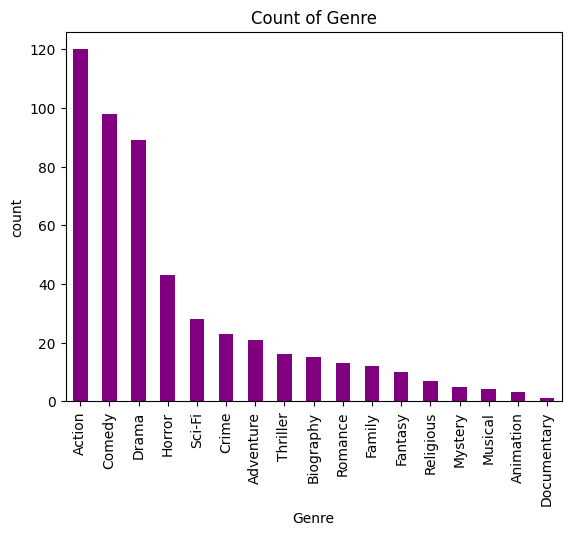

In [32]:
data.genre.value_counts().plot(kind = 'bar', ylabel = 'count', xlabel = 'Genre', 
                               title = 'Count of Genre', color = 'purple')

### data.groupby() Function

This function allows us to group the values in a column and apply an aggregate function to it or other columns we specifiy. 

In [33]:
data.groupby(['genre'])[['profit', 'budget']].agg({'profit': [np.mean, np.max], 'budget' : [np.mean, np.max]})

profit                   budget           
                     mean       amax          mean       amax
genre                                                        
Action       1.510295e+08  724600000  8.281000e+07  250000000
Adventure    2.258048e+08  782000000  8.282857e+07  250000000
Animation    1.865333e+08  251000000  8.966667e+07  135000000
Biography    3.004667e+07  151600000  2.876000e+07  100000000
Comedy       8.352857e+07  894800000  3.991429e+07  215000000
Crime        2.722609e+07  276700000  3.044348e+07   75000000
Documentary  5.850000e+07   58500000  1.000000e+07   10000000
Drama        5.420438e+07  489000000  2.678596e+07  128500000
Family       1.924750e+08  476500000  7.848333e+07  145000000
Fantasy      1.536100e+08  709700000  9.100000e+07  150000000
Horror       6.095814e+07  279500000  1.468837e+07   99500000
Musical      8.975000e+07  380800000  4.025000e+07   75000000
Mystery      7.418000e+07  308300000  2.260000e+07   61000000
Religious    2.677143e+07   89300000  1.014286e+07   16000000
Romance      3.397462e+07   84300000  1.973077e+07   52000000
Sci-Fi       1.901893e+08  630400000  6.525429e+07  165000000
Thriller     1.036938e+08  398000000  3.324375e+07  135000000

#### data.isnull() Function

Returns a boolean value for all the entries in your data and returns True for missing entries. You can use isnull to find missing entries in your dataset. 

In [34]:
data.isnull().sum()

movie_title       0
release_date      0
genre             0
director          0
cast              0
budget            0
box_office_rev    0
profit            0
percent           0
dtype: int64

#### data.dropna() Function

dropna removes all the rows or columns with missing entries in your dataset. When axis is set to 0, rows with missing values will be droped. While when axis is set to 1, columns with missing values will be dropped. 



In [35]:
data.dropna(axis = 0, how = 'any')

,movie_title,release_date,genre,director,cast,budget,box_office_rev,profit,percent
0,10 Cloverfield Lane,2016-03-08,Thriller,Dan Trachtenberg,Mary Elizabeth Winstead,15000000,108300000,93300000,86.15
1,13 Hours: The Secret Soldiers of Benghazi,2016-01-15,Action,Michael Bay,James Badge Dale,45000000,69400000,24400000,35.16
2,2 Guns,2013-08-02,Action,Baltasar Kormákur,Mark Wahlberg,61000000,131900000,70900000,53.75
3,21 Jump Street,2012-03-16,Comedy,Phil Lord,Jonah Hill,55000000,201500000,146500000,72.70
4,22 Jump Street,2014-06-04,Action,Phil Lord,Channing Tatum,84500000,331300000,246800000,74.49
...,...,...,...,...,...,...,...,...,...
503,X-Men: Days of Future Past,2014-05-10,Action,Bryan Singer,Hugh Jackman,200000000,747900000,547900000,73.26
504,You're Next,2013-08-23,Horror,Adam Wingard,Sharni Vinson,1000000,26800000,25800000,96.27
505,Zero Dark Thirty,2012-12-19,Drama,Kathryn Bigelow,Jessica Chastain,40000000,132800000,92800000,69.88
506,Zhong Kui: Snow Girl and the Dark Crystal,2015-02-19,Romance,Peter Pau,Li Bingbing,30000000,64470000,34470000,53.47


#### data.fillna() Function

In [36]:
data['profit'].fillna(data['profit'].mean())

0       93300000
1       24400000
2       70900000
3      146500000
4      246800000
         ...    
503    547900000
504     25800000
505     92800000
506     34470000
507      6000000
Name: profit, Length: 508, dtype: int32

### GreenTrip Data Understanding

In [37]:
df = pd.read_parquet('green_tripdata_2023-01.parquet')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00


#### RatecodeID

In [38]:
df['RatecodeID'].unique()

array([ 1.,  5.,  4.,  3.,  2., 99., nan])

In [39]:
df['RatecodeID'].nunique()

6

In [40]:
df['RatecodeID'].isnull().sum()

4324

In [41]:
df.loc[df['RatecodeID'] == 99.0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,None,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,None,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,None,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,None,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,None,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,None,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,None,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,None,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,None,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,None,1.0,51.7,1.0,NaN,0.0


In [42]:
df['RatecodeID'].fillna(3.0, inplace = True)

In [43]:
df['RatecodeID'] = df['RatecodeID'].astype(int)
#df['RatecodeID'] = df['RatecodeID'].astype('string')

#df['RatecodeID'] = df['RatecodeID'].str.replace('99', '3')

In [44]:
df['RatecodeID'] = df['RatecodeID'].astype('category')

<Axes: xlabel='RatecodeID', ylabel='count'>

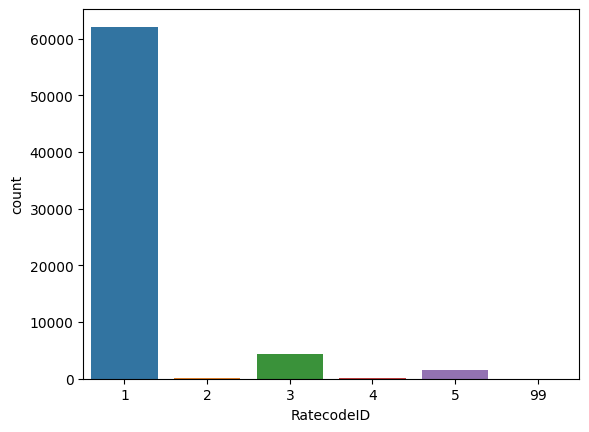

In [45]:
sns.countplot(x = 'RatecodeID', data = df)

### store_and_fwd_flag

In [46]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y', None], dtype=object)

In [47]:
df['store_and_fwd_flag'].isnull().sum()

4324

In [48]:
df['store_and_fwd_flag'].tail()

68206    None
68207    None
68208    None
68209    None
68210    None
Name: store_and_fwd_flag, dtype: object

In [49]:
df['store_and_fwd_flag'] = df.store_and_fwd_flag.dropna()

In [50]:
df['store_and_fwd_flag'].value_counts()

N    63579
Y      308
Name: store_and_fwd_flag, dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             68211 non-null  category      
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

##### Ehail_fee

In [56]:
df.drop('ehail_fee', axis = 1,inplace = True)

#### passenger_count


In [58]:
df.passenger_count.value_counts()

1.0    54299
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: passenger_count, dtype: int64

In [67]:
df.passenger_count.unique()

array([1., 2., 4., 3., 6., 5., 0., 7., 9., 8.])

In [63]:
df.passenger_count.fillna(5, inplace = True)

#### payment_type

In [70]:
df.payment_type.value_counts()

1.0    40686
2.0    22632
3.0     4796
4.0       95
5.0        2
Name: payment_type, dtype: int64

In [66]:
df.payment_type.unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [69]:
df.payment_type.fillna(3.0, inplace = True)

In [71]:
pay_map = {1.0: 'debit card', 2.0: 'app wallet', 3.0: 'credit card', 4.0: 'cash', 5.0: 'crypto'}

df.payment_type = df.payment_type.map(pay_map)

In [72]:
df.payment_type.value_counts()

debit card     40686
app wallet     22632
credit card     4796
cash              95
crypto             2
Name: payment_type, dtype: int64

#### trip_type

In [76]:
df.trip_type.value_counts()

street-hail    62476
dispatch        5735
Name: trip_type, dtype: int64

In [75]:
type_map = {1.0: 'street-hail', 2.0: 'dispatch'}

df.trip_type = df.trip_type.map(type_map)

df.trip_type.fillna('dispatch', inplace = True)

#### congestion_surcharge

In [77]:
df.congestion_surcharge.unique()

array([ 2.75,  0.  ,  2.5 , -2.75,   nan])

In [78]:
df.congestion_surcharge.value_counts()

 0.00    46996
 2.75    16872
 2.50       16
-2.75        3
Name: congestion_surcharge, dtype: int64

In [79]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [82]:
df.drop(['congestion_surcharge','improvement_surcharge', 'DOLocationID', 
         'PULocationID', 'store_and_fwd_flag'], axis = 1, inplace = True)

#### Trip Duration

In [89]:
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']

df.duration = round((df.duration/pd.Timedelta(minutes=1)))

#### Extract Weekday and Hour of Day

In [95]:

#to extract the month
df['month'] = df['lpep_pickup_datetime'].dt.month_name()

#to extract the hour of day
df['hour'] = df['lpep_pickup_datetime'].dt.hour

#to extract the day of week 
df['weekday'] = df['lpep_pickup_datetime'].dt.day_name()



In [96]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,payment_type,trip_type,duration,month,hour,weekday
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,1.0,2.58,14.9,1.0,0.5,4.03,0.0,24.18,debit card,street-hail,11.0,January,0,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,1.0,1.81,10.7,1.0,0.5,2.64,0.0,15.84,debit card,street-hail,7.0,January,0,Sunday
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,1.0,0.00,7.2,1.0,0.5,1.94,0.0,11.64,debit card,street-hail,6.0,January,0,Sunday
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,1.0,1.30,6.5,0.5,1.5,1.70,0.0,10.20,debit card,street-hail,6.0,January,0,Sunday
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,1.0,1.10,6.0,0.5,1.5,0.00,0.0,8.00,debit card,street-hail,6.0,January,0,Sunday


In [104]:
df.to_parquet('trip.parquet')

In [105]:
ls

 Volume in drive C is Windows
 Volume Serial Number is FC00-3AA7

 Directory of C:\Users\TORITSEJU\Documents\Python projects\Python Training

22/07/2023  17:47    <DIR>          .
22/07/2023  17:47    <DIR>          ..
22/07/2023  16:00    <DIR>          .ipynb_checkpoints
26/06/2023  12:28            37,945 Copy_of_Dictionary.ipynb
15/06/2023  16:57            22,198 Copy_of_Loop.ipynb
13/06/2023  14:06            22,406 Copy_of_Strings_Method.ipynb
20/06/2023  12:01            21,922 Copy_of_Tuples.ipynb
17/04/2023  16:50         1,554,114 Data Viz in Python .ipynb
13/07/2023  10:55            24,686 data1.jpeg
17/04/2023  11:31    <DIR>          Datasets
19/07/2023  11:46         1,427,002 green_tripdata_2023-01.parquet
21/07/2023  14:27           355,268 Introduction to Machine Learning .ipynb
10/10/2022  04:35            57,585 Inventory.csv
19/06/2023  13:39            21,810 List.ipynb
19/06/2023  13:29             3,092 list_assignment.ipynb
21/07/2023  13:44           198,815 

In [ ]:
data.copy()

In [107]:
df.where(df.weekday == 'Sunday')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,payment_type,trip_type,duration,month,hour,weekday
0,2.0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,1.0,2.58,14.9,1.0,0.5,4.03,0.0,24.18,debit card,street-hail,11.0,January,0.0,Sunday
1,2.0,2023-01-01 00:51:03,2023-01-01 00:57:49,1,1.0,1.81,10.7,1.0,0.5,2.64,0.0,15.84,debit card,street-hail,7.0,January,0.0,Sunday
2,2.0,2023-01-01 00:35:12,2023-01-01 00:41:32,1,1.0,0.00,7.2,1.0,0.5,1.94,0.0,11.64,debit card,street-hail,6.0,January,0.0,Sunday
3,1.0,2023-01-01 00:13:14,2023-01-01 00:19:03,1,1.0,1.30,6.5,0.5,1.5,1.70,0.0,10.20,debit card,street-hail,6.0,January,0.0,Sunday
4,1.0,2023-01-01 00:33:04,2023-01-01 00:39:02,1,1.0,1.10,6.0,0.5,1.5,0.00,0.0,8.00,debit card,street-hail,6.0,January,0.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68207,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68208,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68209,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
